In [1]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns

In [2]:
data = pd.read_csv('./dataset/Telco-Customer-Churn.csv')
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [4]:
data['TotalCharges'] = data['TotalCharges'].replace(' ',0)
data['TotalCharges'] = data['TotalCharges'].astype(float)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [7]:
data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [8]:
data.duplicated().sum()

np.int64(0)

In [10]:
def convert(value):
    if value == 1:
        return 'Yes'
    else:
        return 'No'
data['SeniorCitizen'] = data['SeniorCitizen'].apply(convert)

In [11]:
data[data['SeniorCitizen'] == 'Yes'].head(2)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
20,8779-QRDMV,Male,Yes,No,No,1,No,No phone service,DSL,No,...,Yes,No,No,Yes,Month-to-month,Yes,Electronic check,39.65,39.65,Yes
30,3841-NFECX,Female,Yes,Yes,No,71,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,No,No,Two year,Yes,Credit card (automatic),96.35,6766.95,No


In [12]:
data['tenureInYear'] = np.round(data['tenure']/12)
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenureInYear
0,7590-VHVEG,Female,No,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,0.0
1,5575-GNVDE,Male,No,No,No,34,Yes,No,DSL,Yes,...,No,No,No,One year,No,Mailed check,56.95,1889.50,No,3.0
2,3668-QPYBK,Male,No,No,No,2,Yes,No,DSL,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,0.0
3,7795-CFOCW,Male,No,No,No,45,No,No phone service,DSL,Yes,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,4.0
4,9237-HQITU,Female,No,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,0.0


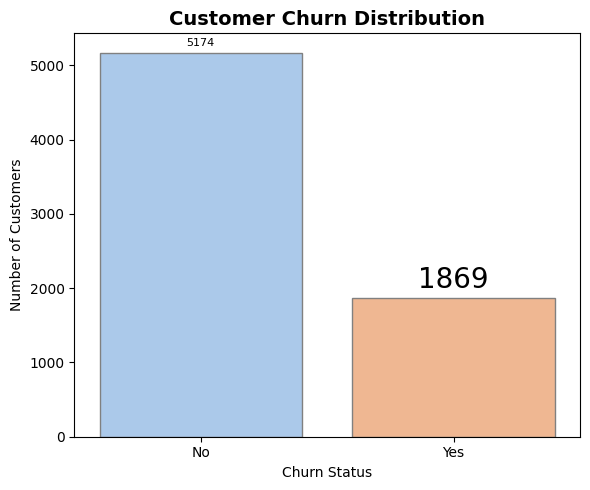

In [14]:
# Create the plot with a pastel color palette
plt.figure(figsize=(6, 5))
ax = sns.countplot(x='Churn', data=data, hue = 'Churn',palette='pastel', edgecolor='gray')
# Add value labels
ax.bar_label(ax.containers[0], fontsize=8, color='black', padding=3)
ax.bar_label(ax.containers[1], fontsize=20, color='black', padding=3)
# Improve title and axis labels
plt.title('Customer Churn Distribution', fontsize=14, fontweight='bold')
plt.xlabel('Churn Status', fontsize=10)
plt.ylabel('Number of Customers', fontsize=10)
# Tidy layout
plt.tight_layout()
plt.show()

In [20]:
data.groupby('Churn')['customerID'].count() / data['customerID'].count() * 100

Churn
No     73.463013
Yes    26.536987
Name: customerID, dtype: float64

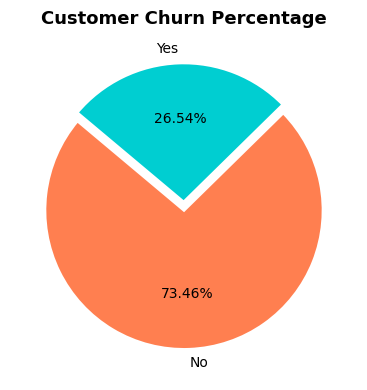

In [14]:
# Prepare data
gb = data.groupby('Churn')[['Churn']].count()
# Set up figure aesthetics
plt.figure(figsize=(4, 4))
colors = ['#FF7F50', '#00CED1'] 
explode = [0.03, 0.03]  # Slight pop-out for emphasis
# Plot pie chart
plt.pie(
    gb['Churn'],
    labels=gb.index,
    autopct='%1.2f%%',
    startangle=140,
    colors=colors,
    explode=explode,
    wedgeprops={'edgecolor': 'white', 'linewidth': 2}
)
# Add clean title
plt.title('Customer Churn Percentage', fontsize=13, fontweight='bold')
# Tidy layout
plt.tight_layout()
plt.show()

### Insights from the Customer Churn Percentage Chart

- The pie chart visualizes the proportion of customers who have churned (`Yes`) versus those who have remained (`No`).
- **26.54%** of customers have churned, indicating that over a quarter of the customer base is not retained.
- **73.46%** of customers have stayed, suggesting that the majority are retained.
- Although the retention rate is relatively high, the **churn rate of 26.54% is still significant** and warrants investigation into possible reasons (e.g., customer service issues, product dissatisfaction, better competitor offerings).
- Reducing churn can lead to **higher customer lifetime value and increased revenue**, so strategies for improving customer retention should be prioritized.


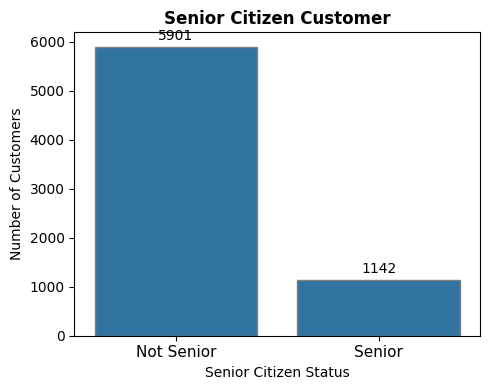

In [21]:
# Create the plot
plt.figure(figsize=(5, 4))
palette = {'Yes': '#DA264D', 'No': '#3F88C5'}  # Churn coloring
ax = sns.countplot(x='SeniorCitizen', data=data, edgecolor='gray')
ax.bar_label(ax.containers[0], fmt='%d', label_type='edge', padding=3)
# Title and axes polish
plt.title('Senior Citizen Customer', fontsize=12, fontweight='bold')
plt.xlabel('Senior Citizen Status', fontsize=10)
plt.ylabel('Number of Customers', fontsize=10)
plt.xticks([0, 1], ['Not Senior', 'Senior'], fontsize=11)
plt.tight_layout()
plt.show()

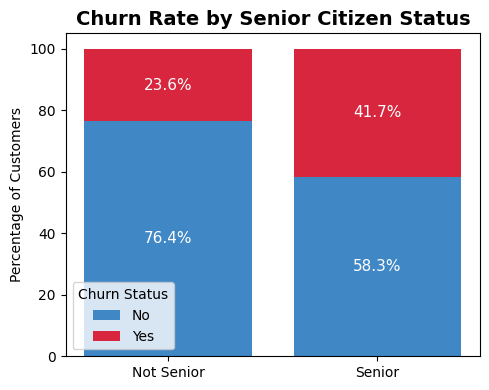

In [22]:
# Step 1: Prepare percentage data
grouped = data.groupby(['SeniorCitizen', 'Churn']).size().unstack(fill_value=0)
percentage = grouped.div(grouped.sum(axis=1), axis=0) * 100
# Step 2: Plot stacked bar chart
plt.figure(figsize=(5, 4))
# Define colors
colors = ['#3F88C5', '#D7263D']  # Example: churn colors
# Plot each layer of the stack
bottom = None
for i, churn_status in enumerate(percentage.columns):
    plt.bar(
        percentage.index,
        percentage[churn_status],
        bottom=bottom,
        label=churn_status,
        color=colors[i]
    )
    bottom = (percentage[churn_status] if bottom is None else bottom + percentage[churn_status])
# Step 3: Add percentage labels
for i in percentage.index:
    cumulative = 0
    for churn_status in percentage.columns:
        perc = percentage.loc[i, churn_status]
        if perc > 5:  # only label if slice is large enough
            plt.text(
                i,
                cumulative + perc / 2,
                f'{perc:.1f}%',
                ha='center',
                va='center',
                color='white',
                fontsize=11
            )
        cumulative += perc
# Final touches
plt.xticks([0, 1], ['Not Senior', 'Senior'])
plt.title('Churn Rate by Senior Citizen Status', fontsize=14, fontweight='bold')
plt.ylabel('Percentage of Customers')
plt.legend(title='Churn Status')
plt.tight_layout()
plt.show()

### Insights from the Churn Rate by Senior Citizen Status Chart

- The chart compares customer churn rates between **Senior Citizens** and **Non-Senior Citizens**.
- Among **Non-Senior customers**, only **23.6%** have churned, while **76.4%** have stayed.
- Among **Senior customers**, a higher **41.7%** have churned, with **58.3%** retained.
- This indicates that **Senior Citizens are significantly more likely to churn** than Non-Senior customers.
- The increased churn among seniors suggests a need to explore targeted strategies to address their specific needs and concerns, such as:
  - Simplified services or billing processes
  - Better support and communication
  - Customized offerings for senior demographics
- Reducing churn in the senior group could improve overall retention and business sustainability.


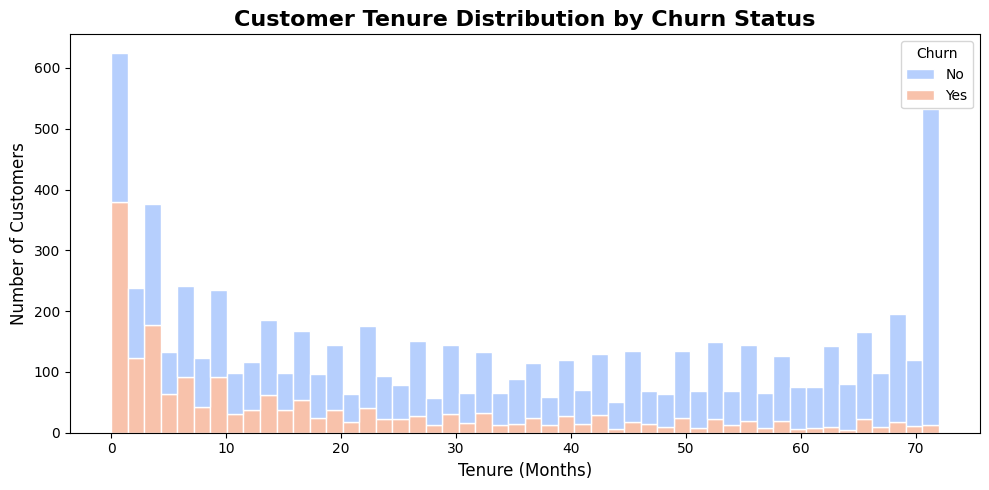

In [23]:
# Create figure
plt.figure(figsize=(10, 5))

# Draw histogram with stack and auto-handled legend
ax = sns.histplot(
    data=data,
    x='tenure',
    bins=50,
    hue='Churn',
    multiple='stack',
    palette='coolwarm',
    edgecolor='white',
    alpha=0.85
)

# Add title and axis labels
plt.title('Customer Tenure Distribution by Churn Status', fontsize=16, fontweight='bold')
plt.xlabel('Tenure (Months)', fontsize=12)
plt.ylabel('Number of Customers', fontsize=12)

# Tidy up layout
plt.tight_layout()
plt.show()

### Insights from the Customer Tenure Distribution by Churn Status Chart

- The chart illustrates how customer churn varies based on their **tenure (in months)**.
- A large number of churned customers are observed within the **first few months (0–10 months)** of tenure.
  - This suggests that many customers churn **early in their subscription period**, possibly due to dissatisfaction or unmet expectations.
- As tenure increases, the number of churned customers **decreases gradually**, indicating that **longer-tenured customers are more likely to stay**.
- Very few customers with **tenure greater than 60 months** have churned, highlighting a trend of strong loyalty among long-term users.
- The spikes at **tenure = 0 and 72 months** could be due to new customers joining recently and long-standing customers still being active.
- These patterns suggest that:
  - Improving the **onboarding experience** and **early customer support** could significantly reduce churn.
  - **Loyalty programs** or **long-term benefits** might be effective in retaining customers for extended periods.


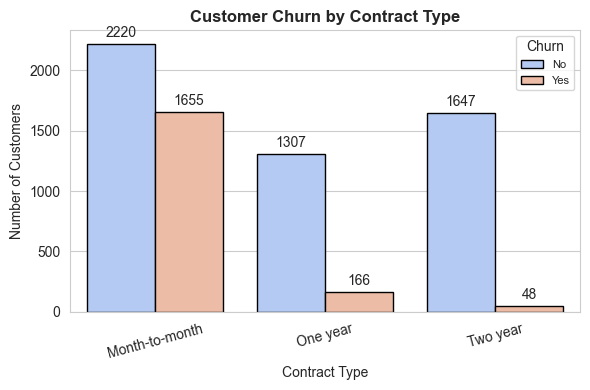

In [24]:
# Set a clean style
sns.set_style("whitegrid")
plt.figure(figsize=(6, 4))

# Create the count plot
ax = sns.countplot(
    x='Contract',
    data=data,
    hue='Churn',
    palette='coolwarm',  # Choose a pleasant color palette
    edgecolor='black'
)
# Add bar labels to both hues
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', padding=3)
# Add title and axis labels with styling
plt.title('Customer Churn by Contract Type', fontsize=12, fontweight='bold')
plt.xlabel('Contract Type', fontsize=10)
plt.ylabel('Number of Customers', fontsize=10)
# Improve legend
plt.legend(title='Churn', title_fontsize='10', fontsize='8')
# Rotate x-axis labels if needed
plt.xticks(rotation=15)
# Tight layout for better spacing
plt.tight_layout()
plt.show()

### Insights from the Chart: Customer Churn by Contract Type

1. *Month-to-Month Contracts Have the Highest Churn:*
   - This represents the highest churn rate among all contract types, indicating that customers with flexible, short-term contracts are more likely to leave.
2. *Longer Contracts Have Significantly Lower Churn:*
   - Only *166* out of *1,473* one-year contract customers have churned.
   - Just *48* out of *1,695* two-year contract customers have churned.
   - This shows that customers on longer-term contracts are more likely to stay, possibly due to commitment, incentives, or penalties for early termination.
3. *Business Implication:*
   - To reduce churn, businesses may consider promoting *longer-term contracts* through *discounts, loyalty programs,* or other incentives.

In [19]:
data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'tenureInYear'],
      dtype='object')

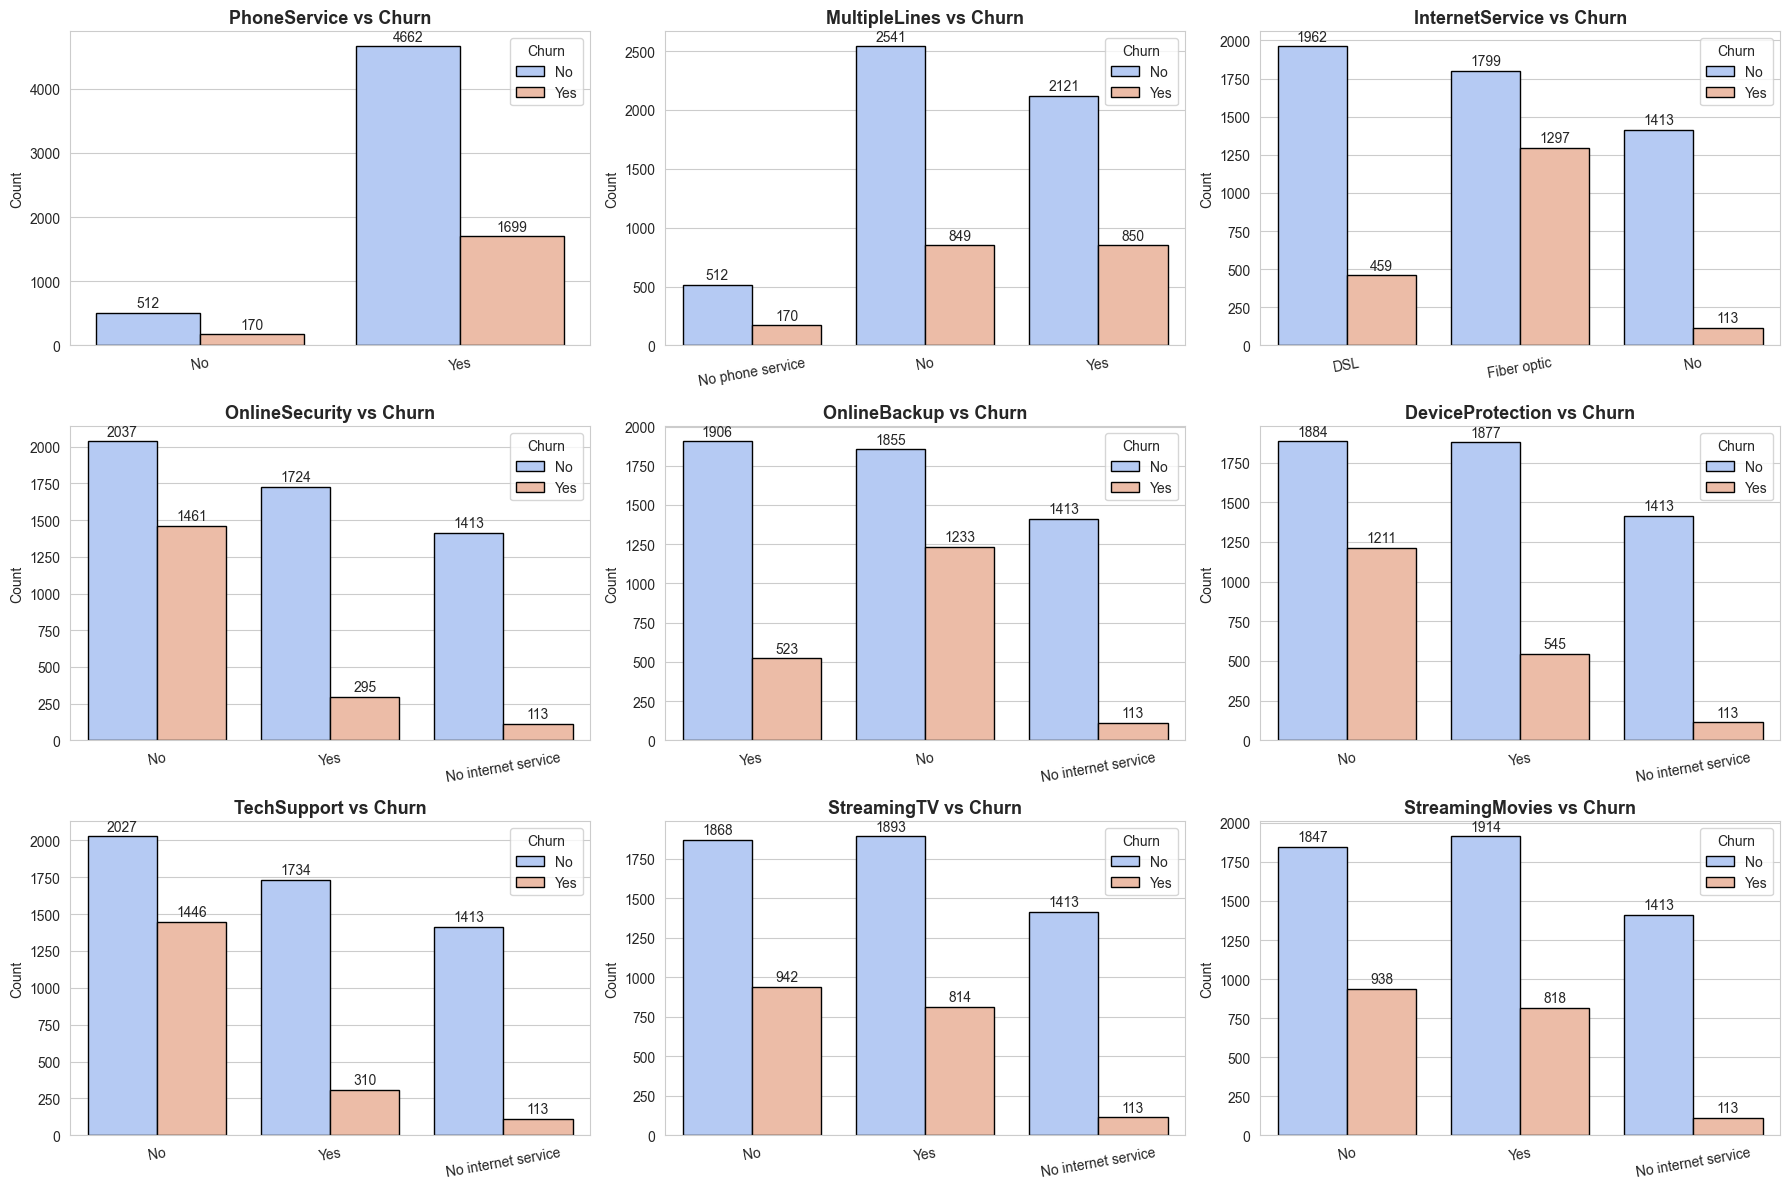

In [20]:
columns_to_plot = [
    'PhoneService', 'MultipleLines', 'InternetService',
    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
    'TechSupport', 'StreamingTV', 'StreamingMovies'
]

# Step 2: Set a clean background style
sns.set_style("whitegrid")

# Step 3: Create 3x3 subplot grid (9 plots)
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(18, 12))
axes = axes.flatten()  # Convert 2D axes to 1D list for easy access

# Step 4: Loop through each column and create a countplot
for i, col in enumerate(columns_to_plot):
    ax = axes[i]
    sns.countplot(
        data=data,
        x=col,
        hue='Churn',
        palette='coolwarm',  # Use a visually distinct color palette
        edgecolor='black',
        ax=ax
    )
    
    ax.set_title(f'{col} vs Churn', fontsize=13, fontweight='bold')
    ax.set_xlabel('')  # Hide x-axis label (optional)
    ax.set_ylabel('Count')

    # Rotate x-axis labels for better readability
    ax.tick_params(axis='x', rotation=10)

    # Add count labels on top of bars
    for container in ax.containers:
        ax.bar_label(container, fmt='%d', label_type='edge', padding=2)

# Step 5: Remove any unused subplots (in case of extra grid space)
for j in range(len(columns_to_plot), len(axes)):
    fig.delaxes(axes[j])

# Step 6: Adjust layout for better spacing
plt.tight_layout()
plt.show()

### Insights from the Chart: Services vs Customer Churn

- **Phone Service:** Most customers use phone service; churn is present but proportionally lower.
- **Multiple Lines:** Has minimal impact on churn; behavior is similar with or without it.
- **Internet Service:** 
  - *Fiber optic* users show higher churn than *DSL* users.
  - *No internet service* group has the lowest churn.
- **Online Security & Backup:** 
  - Customers without these services show higher churn.
  - Indicates these features support retention.
- **Device Protection & Tech Support:**
  - Churn is significantly higher among customers lacking these services.
  - Tech support especially plays a strong role in retention.
- **Streaming TV & Movies:**
  - Users of streaming services show slightly lower churn.
  - Suggests entertainment options contribute to loyalty.

---

### Overall Conclusion:
Customers using **value-added services** (e.g., tech support, security, streaming) are **less likely to churn**, highlighting the importance of **enhancing service offerings** to improve **customer retention**.


In [21]:
for col in columns_to_plot:
    print(f'\n📊 Churn analysis for: {col}')
    
    # Group by column and churn, get count
    churn_counts = data.groupby(col)['Churn'].value_counts().unstack().fillna(0)
    
    # Calculate percentages
    churn_percentages = data.groupby(col)['Churn'].value_counts(normalize=True).unstack().fillna(0) * 100

    # Combine count and percentage into one DataFrame
    combined = pd.DataFrame()
    combined['No (Count)'] = churn_counts.get('No', 0).astype(int)
    combined['Yes (Count)'] = churn_counts.get('Yes', 0).astype(int)
    combined['No (%)'] = churn_percentages.get('No', 0).round(2)
    combined['Yes (%)'] = churn_percentages.get('Yes', 0).round(2)

    print(combined)


📊 Churn analysis for: PhoneService
              No (Count)  Yes (Count)  No (%)  Yes (%)
PhoneService                                          
No                   512          170   75.07    24.93
Yes                 4662         1699   73.29    26.71

📊 Churn analysis for: MultipleLines
                  No (Count)  Yes (Count)  No (%)  Yes (%)
MultipleLines                                             
No                      2541          849   74.96    25.04
No phone service         512          170   75.07    24.93
Yes                     2121          850   71.39    28.61

📊 Churn analysis for: InternetService
                 No (Count)  Yes (Count)  No (%)  Yes (%)
InternetService                                          
DSL                    1962          459   81.04    18.96
Fiber optic            1799         1297   58.11    41.89
No                     1413          113   92.60     7.40

📊 Churn analysis for: OnlineSecurity
                     No (Count)  Yes (Count) 

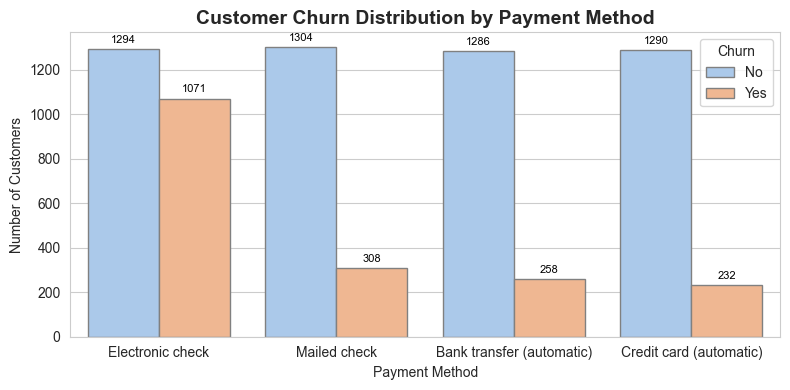

In [26]:
# Create the plot with a pastel color palette
plt.figure(figsize=(8, 4))
ax = sns.countplot(x='PaymentMethod', data=data, hue = 'Churn',palette='pastel', edgecolor='gray')
# Add value labels
ax.bar_label(ax.containers[0], fontsize=8, color='black', padding=3)
ax.bar_label(ax.containers[1], fontsize=8, color='black', padding=3)
# Improve title and axis labels
plt.title('Customer Churn Distribution by Payment Method', fontsize=14, fontweight='bold')
plt.xlabel('Payment Method', fontsize=10)
plt.ylabel('Number of Customers', fontsize=10)
# Tidy layout
plt.tight_layout()
plt.show()

### Insights from the Chart: Customer Churn Distribution by Payment Method

1. *Highest Churn with Electronic Check:*
   - 1071 out of 2365 customers using electronic checks have churned — the highest among all methods.

2. *Lowest Churn with Automatic Payments:*
   - Bank transfer (258 churn) and credit card (232 churn) show much lower churn rates.
   - Indicates that automatic payments help retain customers.

3. *Mailed Checks Show Moderate Churn:*
   - 308 churned out of 1612 mailed check users — better than electronic check but worse than automatic methods.

---

### Conclusion:
- *Automatic payment methods* lead to better retention.
- *Electronic check users* are more likely to churn.
- Promoting *auto-pay options* can help reduce churn.